<a href="https://colab.research.google.com/github/Manojpatil123/Capstone-project-Supervised_machinelearning_classification_on_HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

#Goal of the project

Health insurance is a type of insurance that covers medical bills incurred as a result of an illness. These expenses could include hospitalisation, medicine, or doctor consultation fees. The major goal of our client is to determine whether or not employees who have vehicle insurance will also have health insurance. We need to create a model that predicts which clients are likely to buy health insurance.

#Table of content
* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Feature selection__
   
* __Step 5: Feature engineering__
   
* __Step 6: Train and Test split__
   
* __Step 7: Model training__
   
* __Step 8: Hyperparameter Tuning__

* __Step 9: Conclusion__

In [ ]:
#Installing package
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 4.2 MB/s 
     |████████████████████████████████| 690 kB 50.6 MB/s 
     |████████████████████████████████| 4.7 MB 46.5 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
     |████████████████████████████████| 812 kB 59.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8424b393549996745da0346a639fb816e94b8b327fce90b693281d67912047d3
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=edf339fdb48b49cd000869932a5b2874561b2df438ff25cf25cbcc1100731a70
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: pandas-profiling
    Foun

In [ ]:
pip install scikit-optimize 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 2.8 MB/s 


##Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as ltb

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from skopt.space import Real, Categorical, Integer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

##Data Inspection

In [ ]:
#Copying the dataset
data = df.copy()

In [ ]:
#Showing first 5 rows
data.head()


id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
#Showing Last 5 rows
data.tail()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0

In [ ]:
#Finding the size of the dataset
data.shape

(381109, 12)

Dataset has 381109 rows and 12 columns. It has no missing values.

### Display the complete summary of the dataset
df.info() gives the summary of the dataframe including data types, shape and memory storage.

In [ ]:
#Check datatype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Observation-

The dataset has 3 different dtype kinds. They are object, int, and float. There are 3 categorical features and the rest are numerical. 

###Checking the Null Values
The isnull() function returns a specified value if the expression is NULL. If the expression is NOT NULL, this function returns the expression.

In [ ]:
# Checking for NUll Values
data.isna().sum().to_frame().rename(columns={0:'Missing Value '})

Missing Value 
id                                 0
Gender                             0
Age                                0
Driving_License                    0
Region_Code                        0
Previously_Insured                 0
Vehicle_Age                        0
Vehicle_Damage                     0
Annual_Premium                     0
Policy_Sales_Channel               0
Vintage                            0
Response                           0

No null values found in this dataset.

##Checking Unique Values
The nunique() method returns the number of unique values for each column.

In [ ]:
#checking unique values of each features
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

Observation - 

*   We may remove the Id column because the values in it are all unique.
*   We can encode the Age, Driving License, Previously Insured, Vehicle Age, and Vehicle Damage columns because they only have two unique values.

###Checking Duplicates in the dataset

In [ ]:
#Finding Duplicate values
len(data[data.duplicated()])

0

No Duplicate Values found

###Checking Columns in the dataset

In [ ]:
#checking columns of data
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

###Descriptive Statistics

###Checking the statistics of our data like mean, standard deviation and so on..

To learn more about the dataset features, w e're using the df.describe() function, which provides statistical data on all numerical features of our data frame by default.

In [ ]:
data.describe(include='all')

id  Gender            Age  Driving_License    Region_Code  \
count   381109.000000  381109  381109.000000    381109.000000  381109.000000   
unique            NaN       2            NaN              NaN            NaN   
top               NaN    Male            NaN              NaN            NaN   
freq              NaN  206089            NaN              NaN            NaN   
mean    190555.000000     NaN      38.822584         0.997869      26.388807   
std     110016.836208     NaN      15.511611         0.046110      13.229888   
min          1.000000     NaN      20.000000         0.000000       0.000000   
25%      95278.000000     NaN      25.000000         1.000000      15.000000   
50%     190555.000000     NaN      36.000000         1.000000      28.000000   
75%     285832.000000     NaN      49.000000         1.000000      35.000000   
max     381109.000000     NaN      85.000000         1.000000      52.000000   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
count        381109.000000      381109         381109   381109.000000   
unique                 NaN           3              2             NaN   
top                    NaN    1-2 Year            Yes             NaN   
freq                   NaN      200316         192413             NaN   
mean              0.458210         NaN            NaN    30564.389581   
std               0.498251         NaN            NaN    17213.155057   
min               0.000000         NaN            NaN     2630.000000   
25%               0.000000         NaN            NaN    24405.000000   
50%               0.000000         NaN            NaN    31669.000000   
75%               1.000000         NaN            NaN    39400.000000   
max               1.000000         NaN            NaN   540165.000000   

        Policy_Sales_Channel        Vintage       Response  
count          381109.000000  381109.000000  381109.000000  
unique                   NaN            NaN            NaN  
top                      NaN            NaN            NaN  
freq                     NaN            NaN            NaN  
mean              112.034295     154.347397       0.122563  
std                54.203995      83.671304       0.327936  
min                 1.000000      10.000000       0.000000  
25%                29.000000      82.000000       0.000000  
50%               133.000000     154.000000       0.000000  
75%               152.000000     227.000000       0.000000  
max               163.000000     299.000000       1.000000

##From the statistical part of our data, we can see:

*   We can observe from the age feature that the oldest insured client is 85 and the youngest is 20. There are several outliers in terms of age distributions.
*   The customer has a maximum of 299 days, a minimum of 10, and an average of 154 days associated with the company.
*   The maximum premium a client must pay in a year is $5,40,165 and the minimum premium is $2630, we may infer that most consumers are interested in modest premium amounts.

### Categorical features statistics details

The following argument will help us to mention categorical columns and will also show a summary of all the categorical features.

In [ ]:
data.describe(include='O')

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

Observation -

*   In our dataset, there are more men than women.
*   The age range of 1-2 year vehicles is higher in our dataset.
*   Many of the clients' vehicles have been damaged.

##Exploratory Data Analysis

###Assigning target column to a variable

In [ ]:
#Storing target column into a variable 
Dependent_variable = data['Response']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


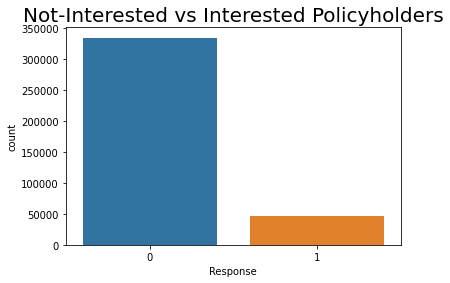

In [ ]:
#Plot the count of the target variable
sns.countplot(data['Response'], data=data)
plt.title('Not-Interested vs Interested Policyholders', fontsize=20) #title for the countplot
plt.show()

Observation -

As we can see, our data is imbalanced, thus we must balance it. But first, let's try some techniques and get some important data.

In [ ]:
data.Response.value_counts()/data.shape[0]

0    0.877437
1    0.122563
Name: Response, dtype: float64

Observation -

The dependant variable has binary values of 0 and 1. We can infer from the plot above that many clients have no interest in purchasing vehicle insurance. 
12.2 percent of the data are 1's and 87.7 percent of the data are 0s.
This data must be handled using the imbalance technique since the output feature is unbalanced.

###Pandas_Profiling of Dataset 

In [ ]:
import pandas_profiling

In [ ]:
data.profile_report()

#Note: If you get an error, change ABCIndexclass to ABCIndex in the boolean.py datatype file..

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observation - 

*  Id feature is 100% unique. 
*  54% of customers are male and 46% of customers are female.
*  Most of the customers are young people.
*  99.8% of customers have driving licence.
*  27.9% of customers are from region code 28.
*  54.2% of customers are Previously_Insured.
*  52.6 percent of consumers have vehicles that are between 1-2 years old.
*  Number of customers with car damage and those without are nearly equal.
*  95 percetile of data lesser than or equal to 55176 and this feature (Annual Premium) has lot of outliers. 
*  87.7% of Customer are not interested in purchasing vehicle insurance.

###Relationship between each variable

Text(0.5, 1.0, 'Relationship between each variable')

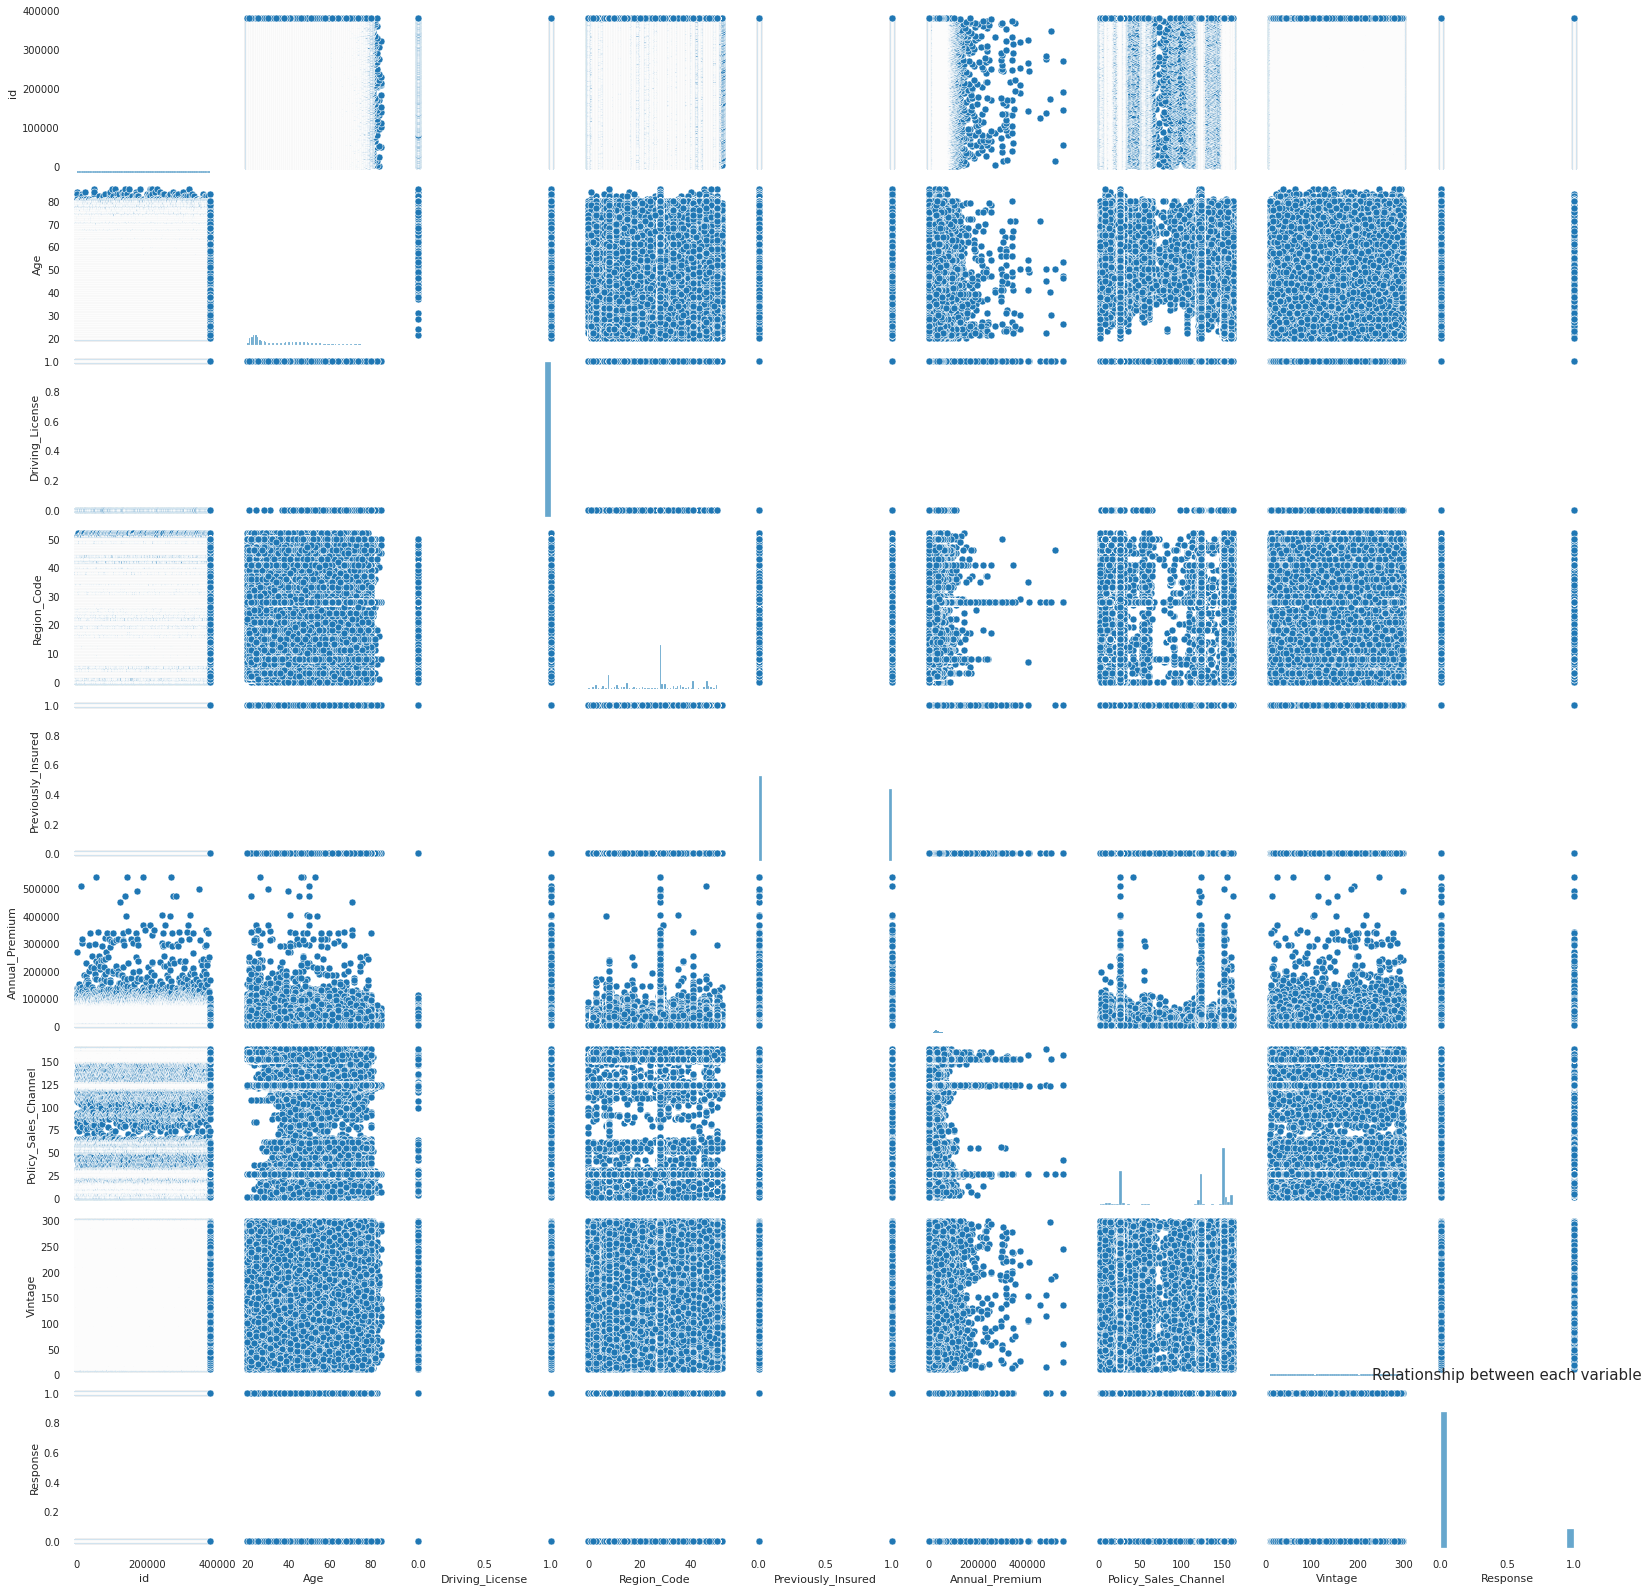

In [ ]:
sns.pairplot(data)
plt.title('Relationship between each variable', fontsize=15)

Observation - 

The graph above shows how each feature is distributed in respect to other features. Since many features have binary values, we cannot see a good relationship with other features. Due to more unique values,some of the features are uniformly distributed. The premium feature has a skewed relationship with the other features since it is skewed to the right.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


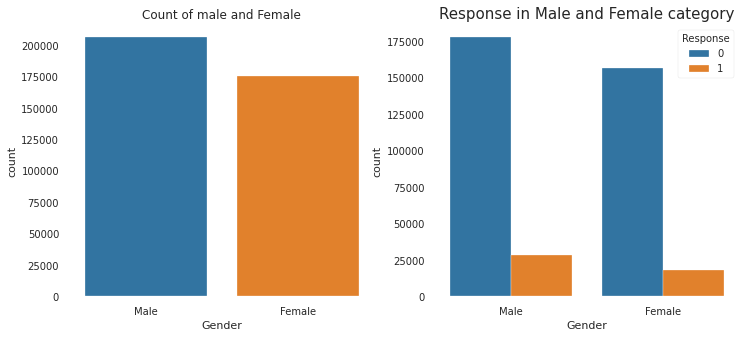

In [ ]:
#Analyzing responses based on gender
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'])
plt.title('Count of male and Female')
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue= data['Response'])
plt.title('Response in Male and Female category', fontsize=15)
plt.show()

In [ ]:
a = data.groupby('Gender')['Age'].mean()
a

Gender
Female    36.372746
Male      40.903095
Name: Age, dtype: float64

*   Gender variable is almost equally distributed
*   We can see that males are more likely to purchase vehicle insurance.



###Age Vs Response

Text(0.5, 1.0, 'Response in terms of Age')

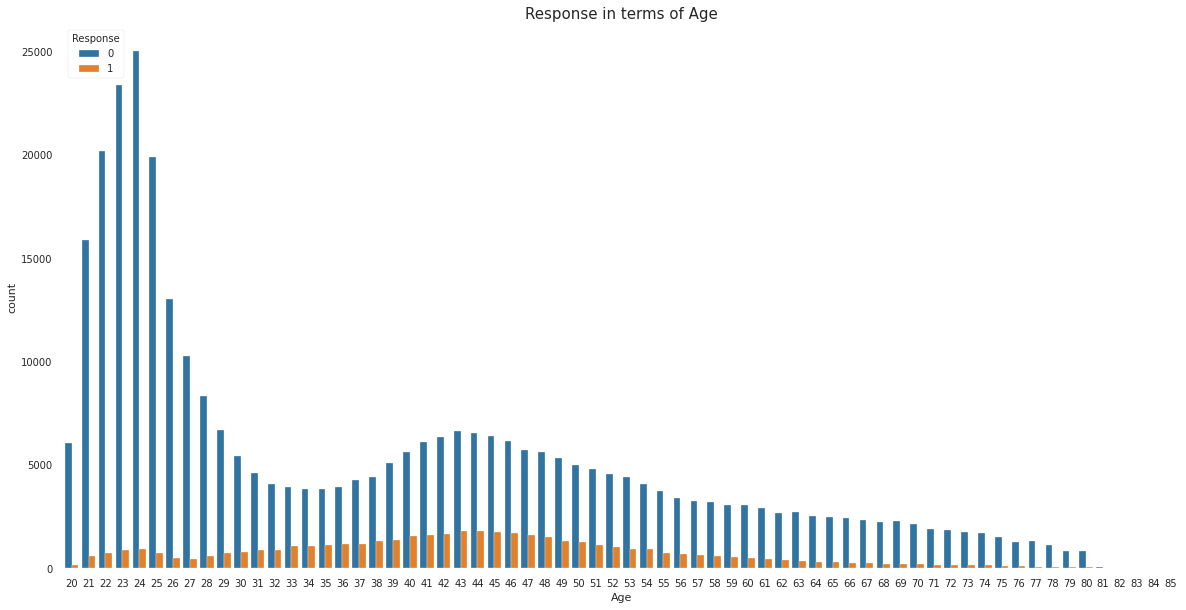

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x='Age', hue='Response', data=data)
plt.title('Response in terms of Age', fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


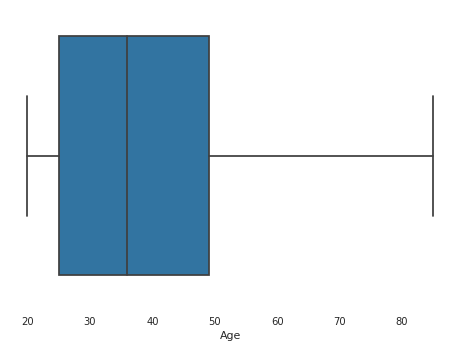

In [ ]:
sns.boxplot(data['Age'])

*  We can see that Ages below 30 are not more interested in purchasing vehicle insurance may be because lack of experience and maturity levels.
*   People who are above 30-60 are more likely to be interested.
*   From boxplot we can see that there are no outliers in the data.

###Driving License Vs Response

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Response in terms of Driving License')

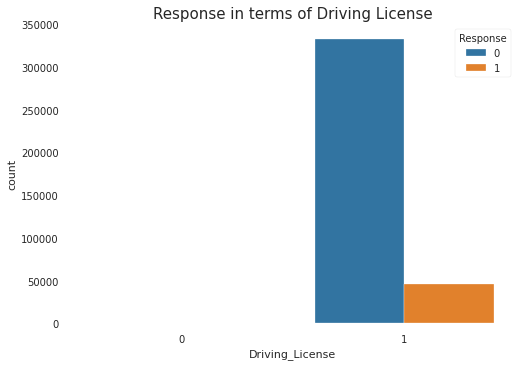

In [ ]:
sns.countplot(data['Driving_License'], hue=data['Response'])
plt.title('Response in terms of Driving License', fontsize = 15)

*   Customers who are interested in Vehicle insurance are almost having the driving license

###Previously Insured Vs Response

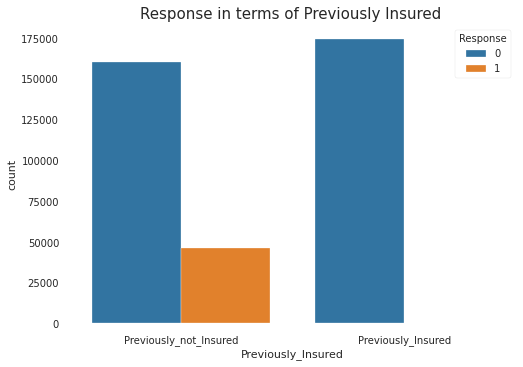

In [ ]:
#In Previously_Insured 1 means Customer already has Vehicle Insurance and 0 means Customer doesn't have Vehicle Insurance yet
ba=sns.countplot(x="Previously_Insured",hue ="Response",data=data)
ba.set_title('Response in terms of Previously Insured ', fontsize=15)
ticks = list(range(0, 2, 1)) 
labels = "Previously_not_Insured Previously_Insured".split()
plt.xticks(ticks, labels);

From the above count-plot, we have a lower number of policyholders with vehicles older than two years, so we must focus more on the other two categories.

###Vehicle age Vs Response

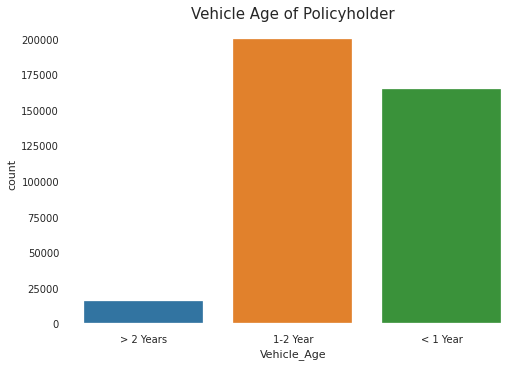

In [ ]:
sns.countplot(x=df['Vehicle_Age'], data=df)
plt.title('Vehicle Age of Policyholder', fontsize=15)
plt.show()

Customers whose vehicle age is between 1-2 years are most likely to be interested when compared to the other two.

###Region code Vs Response

Text(0.5, 1.0, 'Response in terms of Region_Code')

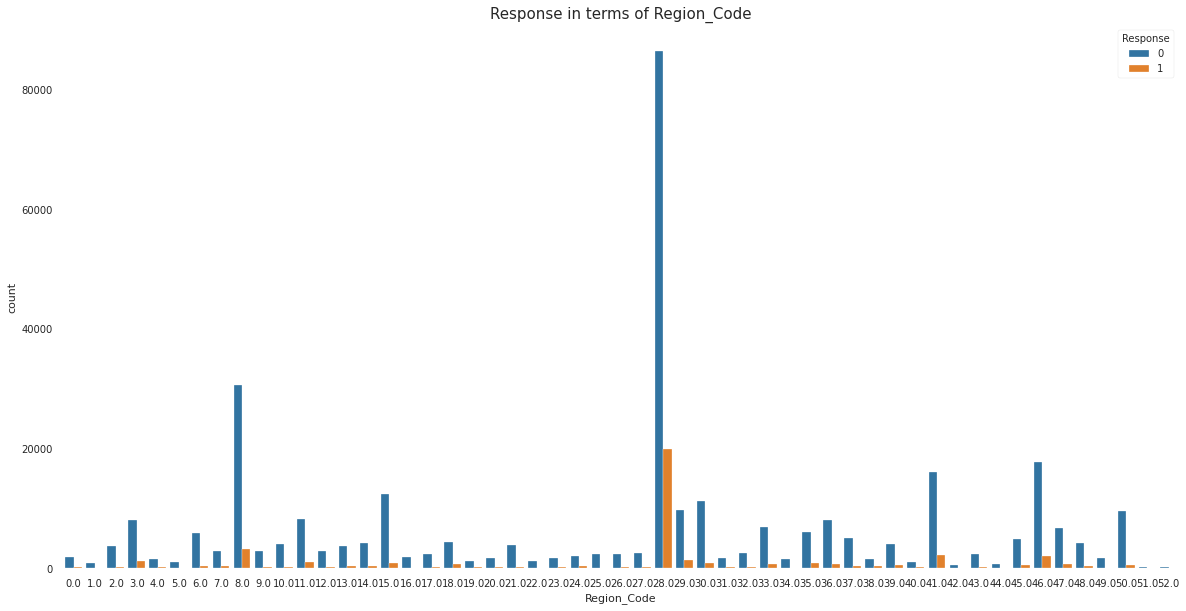

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x='Region_Code', hue='Response', data=data)
plt.title('Response in terms of Region_Code', fontsize=15)

*   Region Code - 0.28 has more customers

###Vehicle_Damage Vs Response

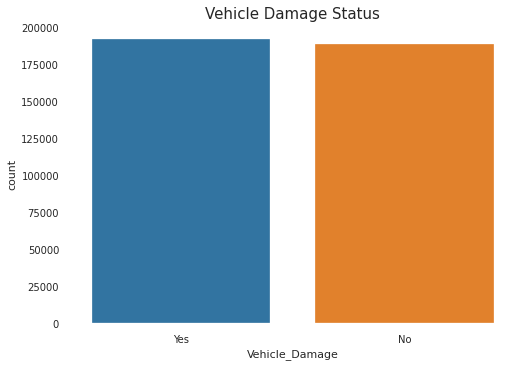

In [ ]:
sns.countplot(x=df['Vehicle_Damage'], data=df)
plt.title('Vehicle Damage Status', fontsize=15)
plt.show()

We can infer from the above plot that the number of policyholders for both vehicle damage statuses are almost equal.

###Lets check distribution of all features

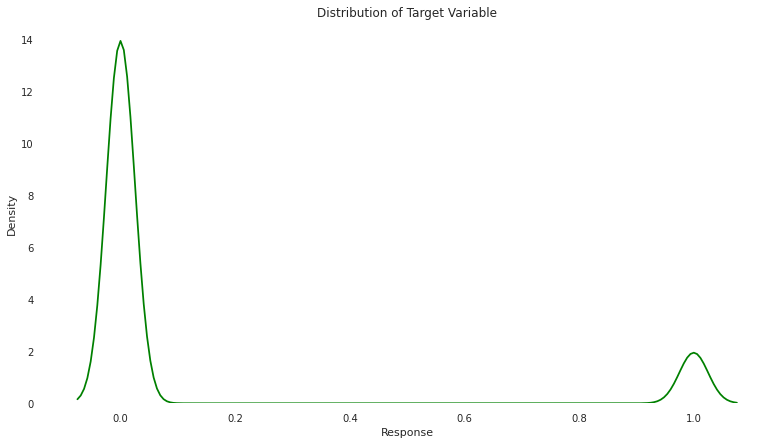

In [ ]:
#Lets check the distribution of target variable
plt.figure(figsize=(13,7))
sns.kdeplot(data['Response'],color='green')
plt.title('Distribution of Target Variable')
plt.show()

Observation -
As we can see, our target feature has only two values: 0 and 1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


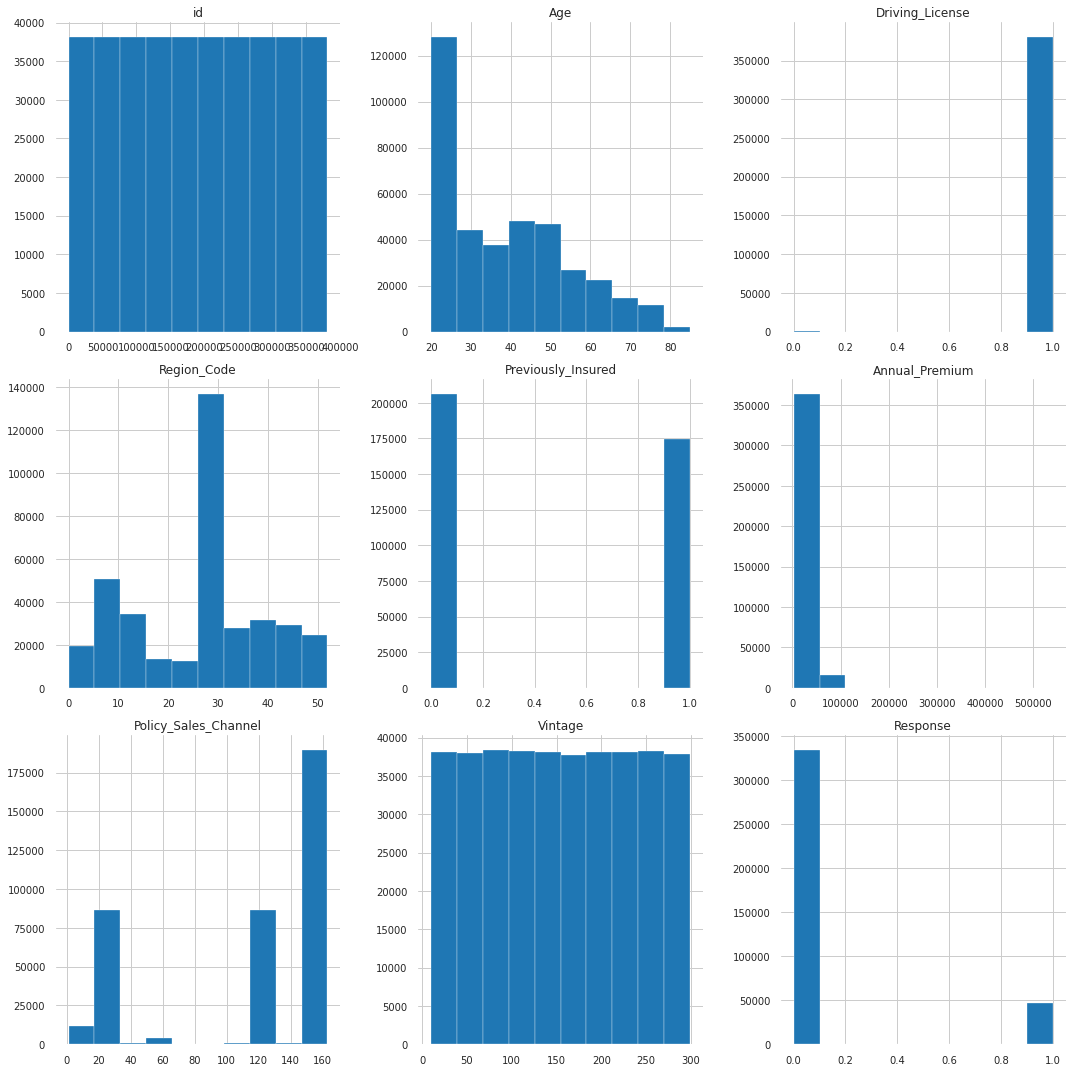

In [ ]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

We can see that no features are distributed normally.

###Checking Outliers

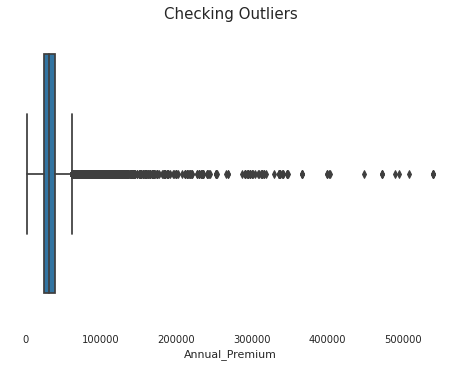

In [ ]:
##Checking Outliers
sns.boxplot(x=df['Annual_Premium'])
plt.title('Checking Outliers', size=15)#title for the countplot
plt.show()

Other than the target variable, we found only one column with more outliers after analysing all of the features- Annual Premium'.

##Feature Selection

In [ ]:
#Checking Duplicate values
len(data[data.duplicated()])

0

No duplicates found.

In [ ]:
#importing library
import missingno as msno

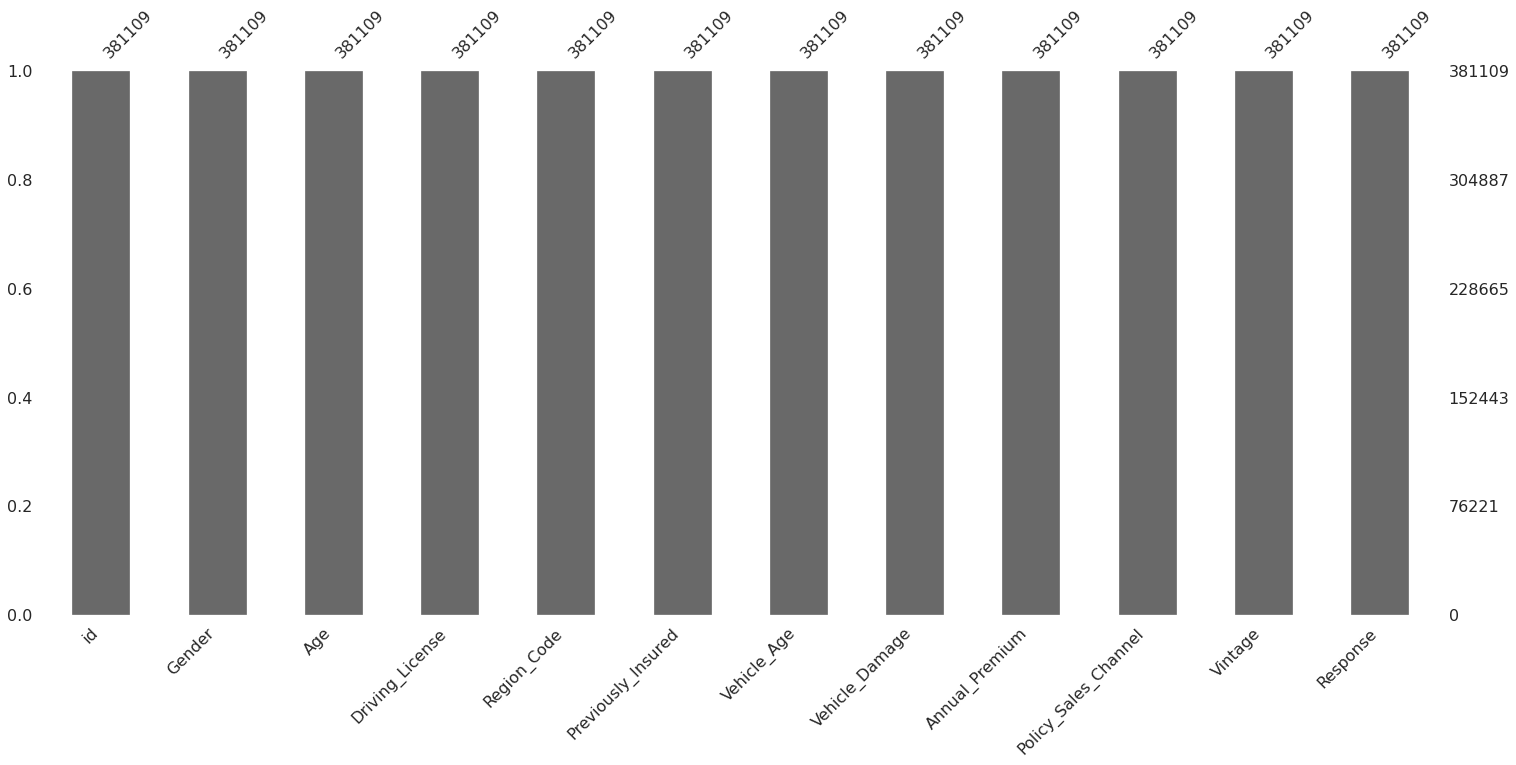

In [ ]:
msno.bar(data)

No null values found in this dataset.

In [ ]:
#Checking Outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

((data<(Q1 - 1.5*IQR)) | (data>(Q3 + 1.5*IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


Age                         0
Annual_Premium          10320
Driving_License           812
Gender                      0
Policy_Sales_Channel        0
Previously_Insured          0
Region_Code                 0
Response                46710
Vehicle_Age                 0
Vehicle_Damage              0
Vintage                     0
id                          0
dtype: int64

Found Outliers in Annual_Premium, Driving_License and Response features.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

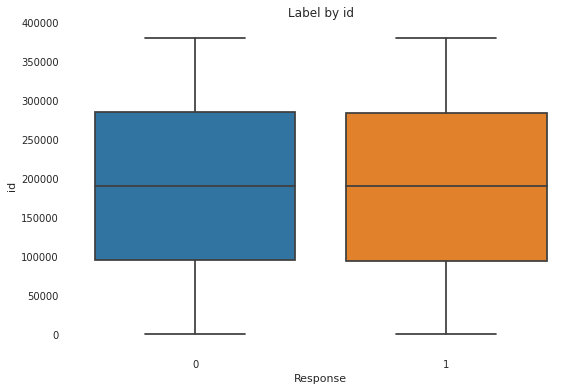

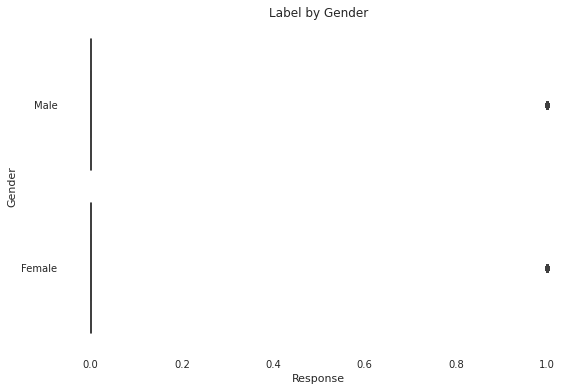

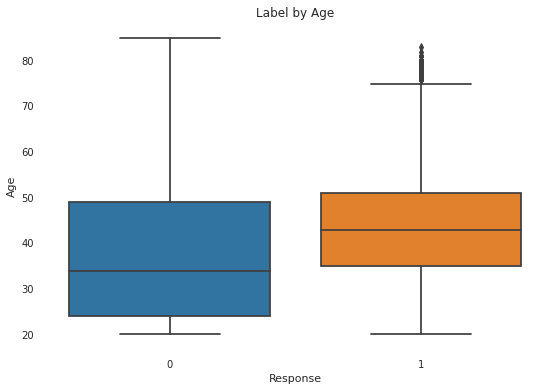

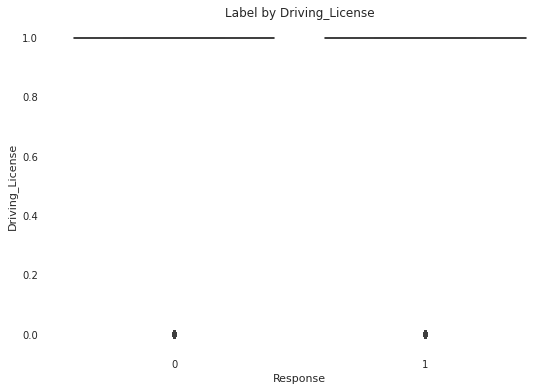

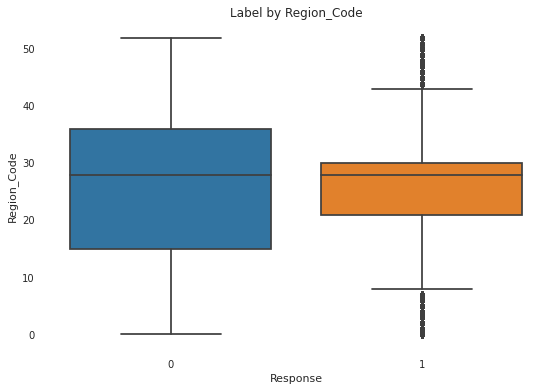

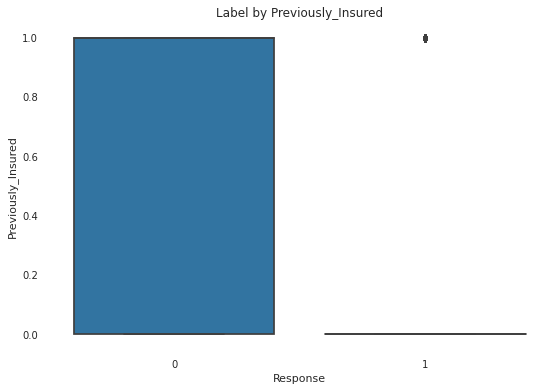

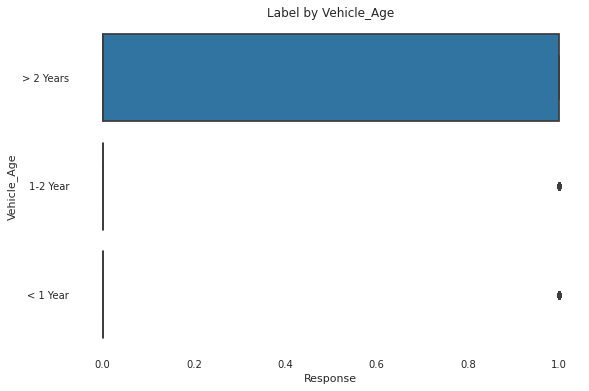

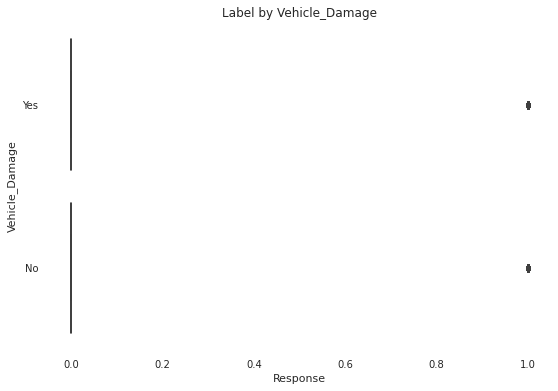

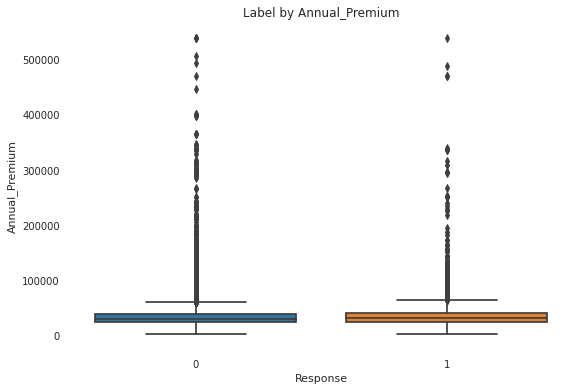

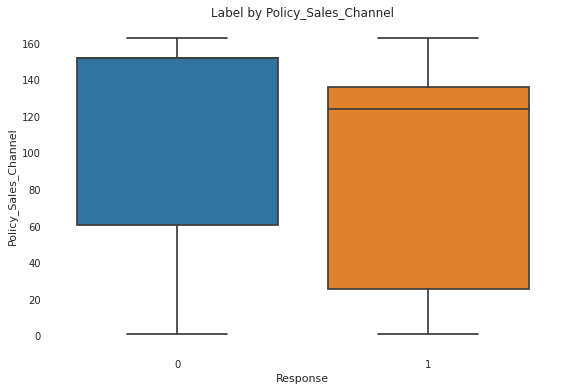

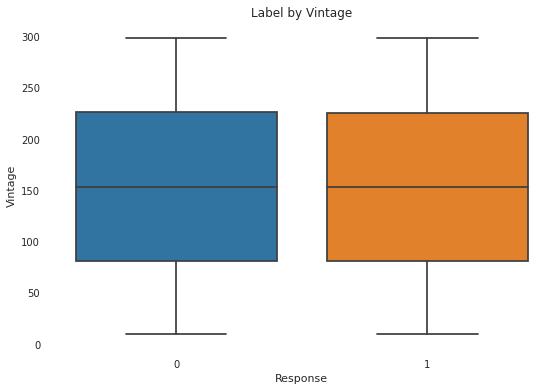

In [ ]:
#Plot a boxplot for the label by each column
for col in df.columns:
  if(col not in ['Response']):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(df['Response'], df[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel(col)
plt.show()  

###Coverting Categorical columns into Numerical columns using Encoding techniques

Label Encoding on Vehicle_Age and Vehicle_Damage columns

In [ ]:
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

One Hot Encoding on Gender Column

In [ ]:
#One hot encoder on Gender
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(data[['Gender']]).toarray())
names=enc.get_feature_names_out()
enc_data.columns=names
df1=data.join(enc_data)

In [ ]:
#Data after Encoding
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  Gender_Female         381109 non-null  float64
 13  Gender_Male           381109 non-null  float64
dtypes: float64(5), int64(8), object(1)
memory usage: 40.

Observation -

We can see that all columns have been numerically converted.

We are removing the gender column since we have separated into two columns, Gender Female and Gender Male.

In [ ]:
#Removing Gender feature
df1.drop('Gender',axis=1,inplace=True)

In [ ]:
#Checking shape after adding/removing features
df1.shape

(381109, 13)

Now we have 321190 rows and 13 columns

In [ ]:
df1.head()

id  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0   1   44                1         28.0                   0            2   
1   2   76                1          3.0                   0            0   
2   3   47                1         28.0                   0            2   
3   4   21                1         11.0                   1            1   
4   5   29                1         41.0                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0               1         40454.0                  26.0      217         1   
1               0         33536.0                  26.0      183         0   
2               1         38294.0                  26.0       27         1   
3               0         28619.0                 152.0      203         0   
4               0         27496.0                 152.0       39         0   

   Gender_Female  Gender_Male  
0            0.0          1.0  
1            0.0          1.0  
2            0.0          1.0  
3            0.0          1.0  
4            1.0          0.0

In [ ]:
#Once again checking the duplicates
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


No Duplicates found in this dataset.

##Feature Engineering

###Variance Threshold Removal

Using this method we can check which columns have constant values.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#Implementation Variance Threshold
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df1)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Observation -

In our data set, there isn't a single column with constant values.*italicised text*

###Feature Selection using f_classification

###Seperating Dependent and Independent Variables

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
independent = df1.drop(['Response'], axis=1) #Contain all independent variables
dependent = df1['Response'] #Contain Dependent variable

In [ ]:
#Finding scores of each feature
f_scores = f_classif(independent, dependent)
f_scores

(array([7.13370735e-01, 4.76694479e+03, 3.93066928e+01, 4.25827356e+01,
        5.02033540e+04, 4.17348459e+03, 5.47422454e+04, 1.94317587e+02,
        7.51301151e+03, 4.20468707e-01, 1.05091307e+03, 1.05091307e+03]),
 array([3.98327606e-001, 0.00000000e+000, 3.62583444e-010, 6.78391651e-011,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.72231514e-044,
        0.00000000e+000, 5.16703652e-001, 3.18074235e-230, 3.18074235e-230]))

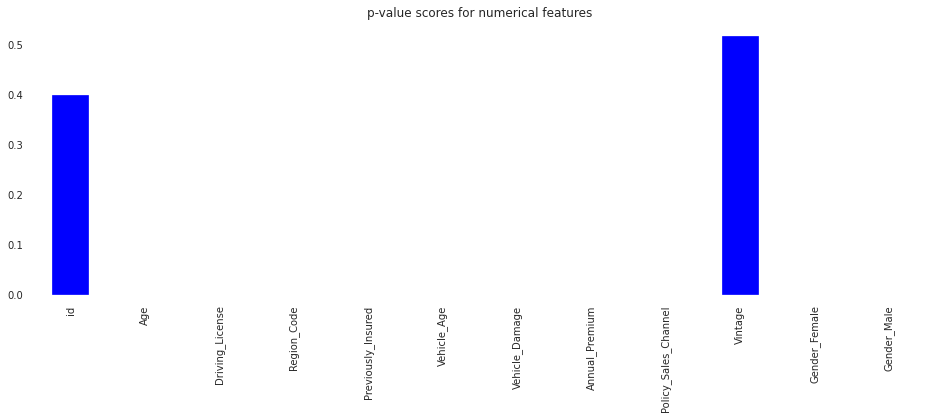

In [ ]:
#The Second array consists of p-values that we need.
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()


We can drop Id and Vintage columns as per the above chart.

###Correlation Feature Selection

Text(0.5, 1.05, 'Pearson correlation of Features')

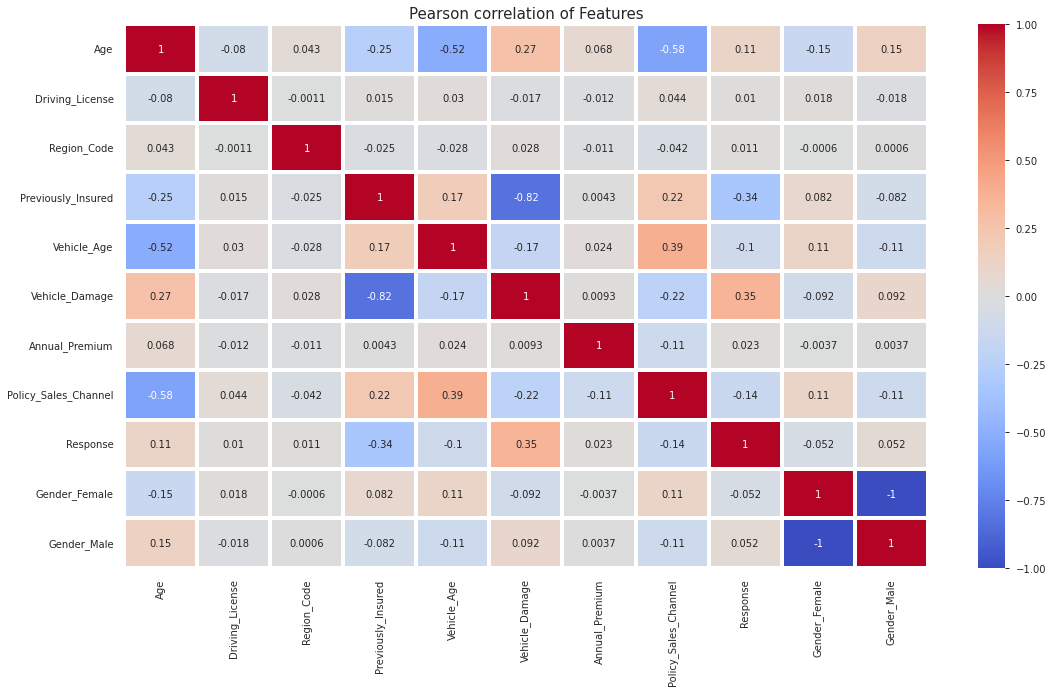

In [ ]:
#Checking correlation of all the columns using heatmap
plt.figure(figsize = (18,10))
correlation = df1.corr()
sns.heatmap(correlation, annot= True,linewidths=3,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=15)

Observations based on correlation plot:-

*  Gender_female and male 100% Multicollinearity we can remove any one feature among these 2
*  Previously insured, vehicle_age and vechicle_damage have high correlations with dependent variable
*  Vintage has verly less negative correlation with dependent variable

In [ ]:
#Dropping gender female
df1.drop('Gender_Female',axis=1,inplace=True)

Obsservation-

We have remove Gender_female since it has 100% Multicollinearity with male columns. So, we can remove any one feature among these 2.

In [ ]:
#Checking shape after removing 3 columns
df1.shape

(381109, 10)

The final dataset shape will be used in Model Training.

###Split Train & Test data

In [ ]:
#Splitting the data into train and test data

X = df1.drop(['Response'], axis=1) #Contain all independent variables
y = df1['Response'] 

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.30,random_state=0)
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(266776, 9) (114333, 9) (266776,) (114333,)


In [ ]:
#Make a list to get most important Features
train_col_list = list(Xtrain.columns)
train_col_list

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Gender_Male']

In [ ]:
ytrain = ytrain.values.reshape(-1,1)

In [ ]:
ytest = ytest.values.reshape(-1,1)

In [ ]:
ytrain.shape

(266776, 1)

In [ ]:
ytest.shape

(114333, 1)

###Handling Imbalanced data

*   One of the most significant challenges when dealing with unbalanced datasets is the metrics used to evaluate their model. Using simpler metrics, such as accuracy score, can be misleading. In a dataset with highly unbalanced classes, the classifier will always "predict" the most common class without performing any feature analysis, and while it will have a high accuracy rate, it will often be incorrect.

### Using Over Sampling Technique

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(Xtrain, ytrain)

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_ros))
print('Resampled dataset shape', len(X_ros))
print('Resampled dataset shape', len(ytrain))
print('Resampled dataset shape', len(Xtrain))

Original dataset shape 381109
Resampled dataset shape 468316
Resampled dataset shape 468316
Resampled dataset shape 266776
Resampled dataset shape 266776


Observation-

The dataset has now been balanced using the oversampling technique, and it is ready for training the model.

###Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_ros = scaler.fit_transform(X_ros)
Xtest = scaler.transform(Xtest)

* Scaled down the train varible which makes easy for a model to learn.


##Model Training

In [ ]:
#Defining all these models
models = [
           ['LinearClassifier: ', Perceptron()],
           ['LogisticRegresseer:', LogisticRegression()],
           ['GNB: ', GaussianNB()],
           ['BNB: ', BernoulliNB()],
           ['KNeighborsClassifier: ', KNeighborsClassifier()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['RandomForestClassifier ',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBRFClassifier: ', XGBRFClassifier()],
           ['AdaBoostClassifier: ',AdaBoostClassifier()],
           ['LgbmClassifier: ',ltb.LGBMClassifier()]
         ]

In [ ]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
      curr_model_data = {}
      curr_model.random_state = 42
      curr_model_data["Name"] = name
      start = time.time()
      curr_model.fit(X_ros,y_ros)
      end = time.time()
      y_train_pred=curr_model.predict(X_ros)
      y_test_pred= curr_model.predict(Xtest)
      curr_model_data["Train_Time"] = end - start
      curr_model_data["Train accuracy"] =accuracy_score(y_ros,y_train_pred )
      curr_model_data["Test accuracy"] =accuracy_score(ytest, y_test_pred)
      curr_model_data["Train precision"] = precision_score(y_ros,y_train_pred)
      curr_model_data["Test precision"] = precision_score(ytest,y_test_pred)
      curr_model_data["Train recall"] = recall_score(y_ros,y_train_pred)
      curr_model_data["Test recall"] = recall_score(ytest,y_test_pred)
      curr_model_data["Train f1 score"] = f1_score(y_ros,y_train_pred)
      curr_model_data["Test f1 score"] = f1_score(ytest,y_test_pred)
      curr_model_data['Train ROC-AUC'] = roc_auc_score(y_ros,y_train_pred)
      curr_model_data["Test ROC-AUC"] = roc_auc_score(ytest,y_test_pred)
      model_data.append(curr_model_data)
 

In [ ]:
results = pd.DataFrame(model_data)
results

Name  Train_Time  Train accuracy  Test accuracy  \
0             LinearClassifier:     0.797806        0.757691       0.664734   
1            LogisticRegresseer:    3.525643        0.784026       0.638722   
2                          GNB:     0.106923        0.784022       0.638713   
3                          BNB:     0.258527        0.786640       0.645063   
4         KNeighborsClassifier:     1.190680        0.903740       0.766629   
5       DecisionTreeClassifier:     2.476090        0.988540       0.820970   
6        RandomForestClassifier    76.680090        0.988527       0.825212   
7   GradientBoostingClassifier:    55.353739        0.798079       0.701276   
8              XGBRFClassifier:    16.065524        0.783768       0.637585   
9           AdaBoostClassifier:    16.132870        0.796545       0.688917   
10              LgbmClassifier:     7.862885        0.804956       0.701302   

    Train precision  Test precision  Train recall  Test recall  \
0          0.707163        0.253378      0.879645     0.883622   
1          0.705400        0.251498      0.975423     0.977221   
2          0.705396        0.251493      0.975423     0.977221   
3          0.708572        0.254691      0.973787     0.975802   
4          0.860280        0.286320      0.964054     0.598567   
5          0.979439        0.294516      0.998031     0.324297   
6          0.978984        0.307778      0.998488     0.334729   
7          0.738096        0.282578      0.924043     0.925135   
8          0.704867        0.251002      0.976332     0.978002   
9          0.731119        0.275971      0.938089     0.938618   
10         0.741012        0.283366      0.937615     0.930954   

    Train f1 score  Test f1 score  Train ROC-AUC  Test ROC-AUC  
0         0.784030       0.393826       0.757691      0.758792  
1         0.818722       0.400041       0.784026      0.784178  
2         0.818719       0.400035       0.784022      0.784173  
3         0.820275       0.403948       0.786640      0.787185  
4         0.909216       0.387353       0.903740      0.694411  
5         0.988648       0.308690       0.988540      0.607545  
6         0.988640       0.320688       0.988527      0.614447  
7         0.820668       0.432922       0.798079      0.797470  
8         0.818683       0.399478       0.783768      0.783865  
9         0.821772       0.426533       0.796545      0.796216  
10        0.827800       0.434483       0.804956      0.799986

Observation -

*  Hurrah! Here are the results of all the models. **The best evaluation metric is recall, and we can see that Boosting Algorithms are performing well in this case.**

   However, we can perform hyperparameter tuning on these models to determine   the optimum model.

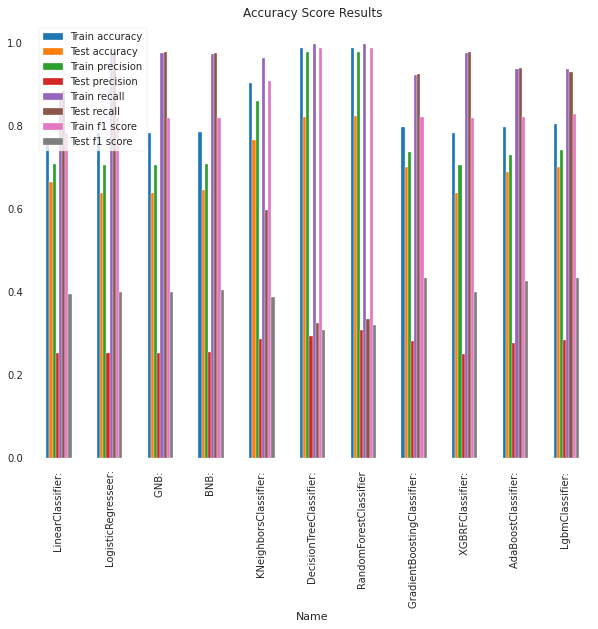

In [ ]:
#Draw plot for above models metrices
results.plot(x="Name", y=['Train accuracy' , 'Test accuracy' ,'Train precision','Test precision','Train recall','Test recall','Train f1 score','Test f1 score'], kind="bar" , title = 'Accuracy Score Results' , figsize= (10,8)) 

Observation - 

**RandomForestClassifier is performing well in terms of accuracy.**

###Confusion matrix for better Understanding

In [ ]:
model_data2 = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_ros,y_ros)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["conf_mat"] = confusion_matrix(ytest,[round(value) for value in (curr_model.predict(Xtest))])
    model_data2.append(curr_model_data)

In [ ]:
Conf_Mat_df= pd.DataFrame(model_data2)
Conf_Mat_df

Name  Train_Time                         conf_mat
0             LinearClassifier:     0.643816  [[63549, 36692], [1640, 12452]]
1            LogisticRegresseer:    3.542373   [[59256, 40985], [321, 13771]]
2                          GNB:     0.129461   [[59255, 40986], [321, 13771]]
3                          BNB:     0.161138   [[60001, 40240], [341, 13751]]
4         KNeighborsClassifier:     1.132573   [[79216, 21025], [5657, 8435]]
5       DecisionTreeClassifier:     2.667495   [[89294, 10947], [9522, 4570]]
6        RandomForestClassifier   118.584221   [[89632, 10609], [9375, 4717]]
7   GradientBoostingClassifier:    69.476056  [[67142, 33099], [1055, 13037]]
8              XGBRFClassifier:    16.003589   [[59115, 41126], [310, 13782]]
9           AdaBoostClassifier:    17.255946   [[65539, 34702], [865, 13227]]
10              LgbmClassifier:     5.083895   [[67063, 33178], [973, 13119]]

Observation - 

*  We can observe from the confusion matrix that LgbmClassifier, XGBRFClassifier are the top models.

###Let's perform Cross Validation and Hyper parameter tuning on these models to get better results.

##Hyperparameter Tuning on RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=40)
#Cross validation and hyperparameter tuning
rf_bayes = BayesSearchCV(estimator= rf,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=10)

rf_bayes.fit(X_ros,y_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=61, max_features=auto, min_samples_leaf=20, min_samples_split=76, n_estimators=62; total time=  35.7s
[CV] END max_depth=61, max_features=auto, min_samples_leaf=20, min_samples_split=76, n_estimators=62; total time=  44.4s
[CV] END max_depth=61, max_features=auto, min_samples_leaf=20, min_samples_split=76, n_estimators=62; total time=  40.2s
[CV] END max_depth=61, max_features=auto, min_samples_leaf=20, min_samples_split=76, n_estimators=62; total time=  33.1s
[CV] END max_depth=61, max_features=auto, min_samples_leaf=20, min_samples_split=76, n_estimators=62; total time=  34.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=85, max_features=sqrt, min_samples_leaf=10, min_samples_split=93, n_estimators=139; total time= 1.4min
[CV] END max_depth=85, max_features=sqrt, min_samples_leaf=10, min_samples_split=93, n_estimators=139; total time= 1.3min
[CV] END max_depth=85, max_featur

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
              n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
rf_bayes.best_params_

OrderedDict([('max_depth', 91),
             ('max_features', 'auto'),
             ('min_samples_leaf', 10),
             ('min_samples_split', 36),
             ('n_estimators', 78)])

In [ ]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=91, min_samples_leaf=10, min_samples_split=36,
                       n_estimators=78, random_state=40)

In [ ]:
#make prediction
train_pred=rf_bayes.best_estimator_.predict(X_ros)
test_pred=rf_bayes.best_estimator_.predict(Xtest)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_ros, train_pred)
test_accuracy = accuracy_score(ytest, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8510129912281451
The accuracy on test dataset is 0.7339700698835857


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_ros, train_pred)
test_cm = confusion_matrix(ytest, test_pred)

In [ ]:
train_cm
test_cm

array([[71770, 28471],
       [ 1945, 12147]])

In [ ]:
print(classification_report(y_ros,train_pred))
print("\n")
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83    234158
           1       0.79      0.97      0.87    234158

    accuracy                           0.85    468316
   macro avg       0.87      0.85      0.85    468316
weighted avg       0.87      0.85      0.85    468316



              precision    recall  f1-score   support

           0       0.97      0.72      0.83    100241
           1       0.30      0.86      0.44     14092

    accuracy                           0.73    114333
   macro avg       0.64      0.79      0.63    114333
weighted avg       0.89      0.73      0.78    114333



###Roc curve for Train data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


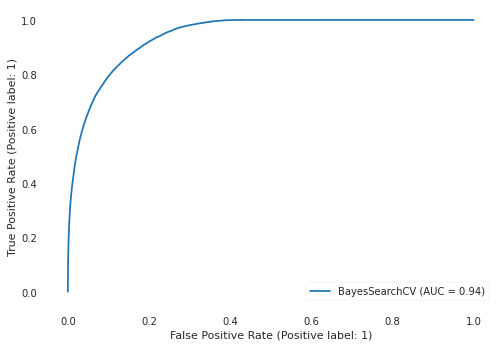

In [ ]:
metrics.plot_roc_curve(rf_bayes, X_ros, y_ros) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


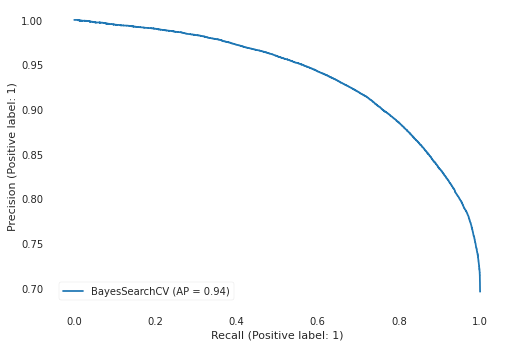

In [ ]:
metrics.plot_precision_recall_curve(rf_bayes, X_ros, y_ros)

###Roc curve for Test data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


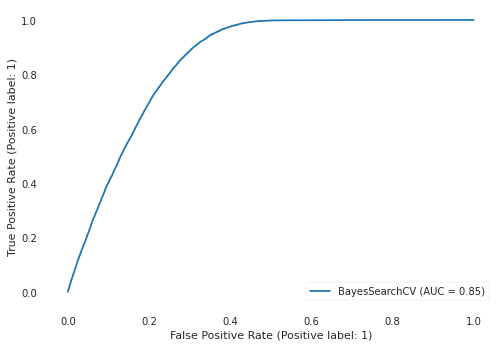

In [ ]:
metrics.plot_roc_curve(rf_bayes, Xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


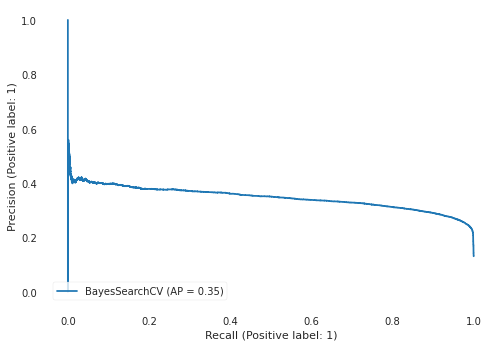

In [ ]:
metrics.plot_precision_recall_curve(rf_bayes, Xtest, ytest)

#Hyperparameter Tuning on LgbmClassifier

In [ ]:
lgbm = ltb.LGBMClassifier()
#Cross validation and hyperparameter tuning
lg_bayes = BayesSearchCV(estimator= lgbm,
                         search_spaces = {
                          'max_depth':Integer(4,100) ,
                          'num_leaves': Integer(3,200),
                          'n_estimators': Integer(3,200),
                          'min_split_gain': Integer(1.0,10.0),
                          'n_jobs': Integer(1,30),
                        },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=10)

lg_bayes.fit(X_ros,y_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=35, min_split_gain=4, n_estimators=45, n_jobs=22, num_leaves=199; total time=  10.9s
[CV] END max_depth=35, min_split_gain=4, n_estimators=45, n_jobs=22, num_leaves=199; total time=  10.9s
[CV] END max_depth=35, min_split_gain=4, n_estimators=45, n_jobs=22, num_leaves=199; total time=  10.6s
[CV] END max_depth=35, min_split_gain=4, n_estimators=45, n_jobs=22, num_leaves=199; total time=  10.8s
[CV] END max_depth=35, min_split_gain=4, n_estimators=45, n_jobs=22, num_leaves=199; total time=  10.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=6, min_split_gain=9, n_estimators=135, n_jobs=29, num_leaves=61; total time=   6.5s
[CV] END max_depth=6, min_split_gain=9, n_estimators=135, n_jobs=29, num_leaves=61; total time=   6.5s
[CV] END max_depth=6, min_split_gain=9, n_estimators=135, n_jobs=29, num_leaves=61; total time=   6.1s
[CV] END max_depth=6, min_split_gain=9, n_estimators=

BayesSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=4, high=100, prior='uniform', transform='normalize'),
                             'min_split_gain': Integer(low=1.0, high=10.0, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=3, high=200, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=3, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
lg_bayes.best_params_

OrderedDict([('max_depth', 35),
             ('min_split_gain', 4),
             ('n_estimators', 45),
             ('n_jobs', 22),
             ('num_leaves', 199)])

In [ ]:
lg_bayes.best_estimator_

LGBMClassifier(max_depth=35, min_split_gain=4, n_estimators=45, n_jobs=22,
               num_leaves=199)

In [ ]:
#make prediction
lgtrain_pred=lg_bayes.best_estimator_.predict(X_ros)
lgtest_pred=lg_bayes.best_estimator_.predict(Xtest)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_ros, lgtrain_pred)
test_accuracy = accuracy_score(ytest, lgtest_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8173711767268255
The accuracy on test dataset is 0.710346094303482


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_ros, lgtrain_pred)
test_cm = confusion_matrix(ytest, lgtest_pred)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_ros,lgtrain_pred))
print("\n")
print(classification_report(ytest,lgtest_pred))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79    234158
           1       0.75      0.95      0.84    234158

    accuracy                           0.82    468316
   macro avg       0.84      0.82      0.81    468316
weighted avg       0.84      0.82      0.81    468316



              precision    recall  f1-score   support

           0       0.98      0.68      0.80    100241
           1       0.29      0.92      0.44     14092

    accuracy                           0.71    114333
   macro avg       0.64      0.80      0.62    114333
weighted avg       0.90      0.71      0.76    114333



###Roc curve for Train data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


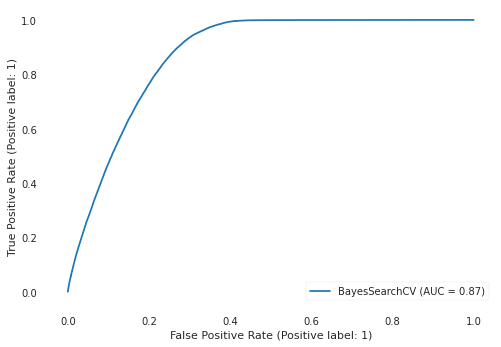

In [ ]:
metrics.plot_roc_curve(lg_bayes, X_ros, y_ros) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


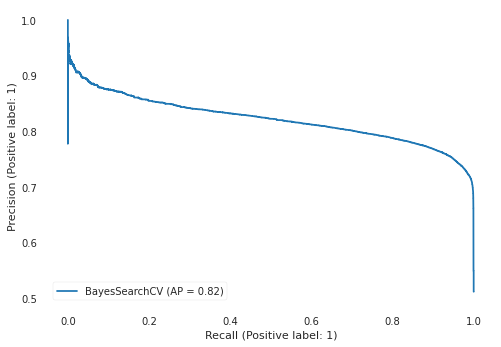

In [ ]:
metrics.plot_precision_recall_curve(lg_bayes, X_ros, y_ros)

###Roc Curve for Test data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


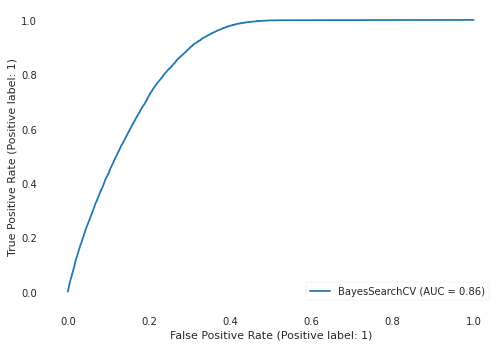

In [ ]:
metrics.plot_roc_curve(lg_bayes, Xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


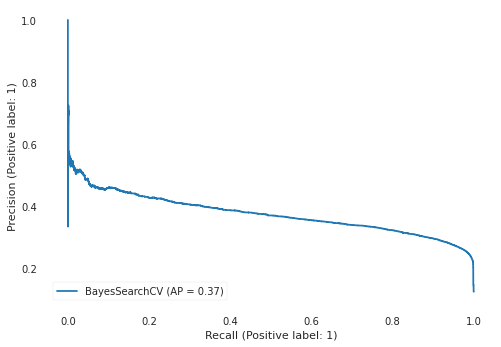

In [ ]:
metrics.plot_precision_recall_curve(lg_bayes, Xtest, ytest)

##**Observation**

The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with LGBM and Random Forest models performed better than other models.

In comparison to both models, the LGBM model performed well on the most essential evaluation metric, 'Recall,' with values of 0.82 on train data and 0.80 on test data. As a result, **we conclude LGBMClassifier is the best model for this dataset.**

###Finally, let us highlight the most important features that will be beneficial to the client.

In [ ]:
importances = lg_bayes.best_estimator_.feature_importances_
importance_dict = {'Feature' : train_col_list,
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
#Our top feature in descending order
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
6        Annual_Premium                2291
2           Region_Code                2245
0                   Age                1775
7  Policy_Sales_Channel                1439
4           Vehicle_Age                 146
5        Vehicle_Damage                  81
8           Gender_Male                  65
3    Previously_Insured                  51
1       Driving_License                  42

The most significant features are listed from top to bottom.

##Conclusion:


Our client is an insurance firm that has supplied Health Insurance to its customers. They now need assistance in developing a model to predict whether the policyholders (customers) from the previous year will be interested in the company's Vehicle Insurance.

Building a model to predict if a client is interested in Vehicle Insurance is extremely beneficial to the company because they can then plan communication strategy to reach out to those customers and optimise its business model and revenue.

Now, we have information about demographics (gender, age, region code type), vehicles (vehicle age, damage), policies (premium, sourcing channel), and so on to predict whether the customer would be interested in Vehicle insurance.

Key points:

*   Customers of age between 30 to 60 are more likely to buy insurance.

*   Customers with Vehicle_Damage are likely to buy insurance.

*   Customers with Driving License have higher chance of buying Insurance.

*   The variable such as Age, Previously_insured,Annual_premium are more affecting the target variable.

*   We can see that **LGBM model preform better** for this dataset.

Improvements:

1. By using a marketing and advertising approach, we can reduce the gender gap.

2. We can clearly see that we have a larger number of consumers without vehicle insurance, therefore we can easily target them directly with our campaign.

3. Since there are less policy holders with vehicles older than two years, we must pay more attention to the other two categories (1-2 years and >1 year). Because most sales agencies that offer vehicle insurance for the first year are actually our target and we can give them the best incentives to reduce competition in the market.

4. As we saw that we have nearly equal policy holders for both vehicle damage status, so we can target those policy holders whose vehicles are damaged in the past.